In [1]:
# Скачиваем необходимые библиотеки
packages <- c("DOSE",
              "clusterProfiler",
              "enrichplot")


if (!requireNamespace(c(packages), quietly = TRUE)) {
    BiocManager::install(packages)
}

Bioconductor version 3.10 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)

Installing package(s) 'DOSE', 'clusterProfiler', 'enrichplot'

also installing the dependencies ‘triebeard’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘RcppArmadillo’, ‘fastmatch’, ‘urltools’, ‘gridGraphics’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘DO.db’, ‘fgsea’, ‘GOSemSim’, ‘qvalue’, ‘rvcheck’, ‘cowplot’, ‘europepmc’, ‘ggplotify’, ‘ggraph’, ‘ggridges’, ‘gridExtra’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'ff'



In [2]:
# Подключаем библиотеки
library(DOSE)
library(clusterProfiler)
library(enrichplot)



DOSE v3.12.0  For help: https://guangchuangyu.github.io/software/DOSE

If you use DOSE in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Guang-Rong Yan, Qing-Yu He. DOSE: an R/Bioconductor package for Disease Ontology Semantic and Enrichment analysis. Bioinformatics 2015, 31(4):608-609


Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.



In [3]:
# Получаем данные 
data(geneList)

In [4]:
# Выведем некоторые идишнки генов
genes <- names(geneList)[abs(geneList) > 1.5]
head(genes)

[1] "4312"  "8318"  "10874" "55143" "55388" "991"

In [9]:
# Запустим GSE анализ для базы данных DO
x <- enrichDO(gene          = genes,  # сипсок генов
              ont           = "DO",  # имя базы данных
              pvalueCutoff  = 0.05,  # значение pValue, при котором нужно убирать ген
              pAdjustMethod = "BH",  # Метод поправки для pValue
              universe      = names(geneList),
              minGSSize     = 5,
              maxGSSize     = 500,
              qvalueCutoff  = 0.05,
              readable      = FALSE)
head(x)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
DOID:170,DOID:170,endocrine gland cancer,48/331,472/6268,5.662129e-06,0.004784499,0.003826407,10874/7153/1381/6241/11065/10232/332/6286/2146/10112/891/9232/4171/993/5347/4318/3576/1515/4821/8836/3159/7980/5888/333/898/9768/4288/3551/2152/9590/185/7043/3357/2952/5327/3667/1634/1287/4582/7122/3479/4680/6424/80310/652/8839/9547/1524,48
DOID:10283,DOID:10283,prostate cancer,40/331,394/6268,3.859157e-05,0.013921739,0.011133923,4312/6280/6279/597/3627/332/6286/2146/4321/4521/891/5347/4102/4318/701/3576/79852/10321/6352/4288/3551/2152/247/2952/3487/367/3667/4128/4582/563/3679/4117/7031/3479/6424/10451/80310/652/4036/10551,40
DOID:3459,DOID:3459,breast carcinoma,37/331,357/6268,4.942629e-05,0.013921739,0.011133923,4312/6280/6279/7153/4751/890/4085/332/6286/6790/891/9232/10855/4171/5347/4318/701/2633/3576/9636/898/8792/4288/2952/4982/4128/4582/7031/3479/771/4250/2066/3169/10647/5304/5241/10551,37
DOID:3856,DOID:3856,male reproductive organ cancer,40/331,404/6268,6.821467e-05,0.014410349,0.011524689,4312/6280/6279/597/3627/332/6286/2146/4321/4521/891/5347/4102/4318/701/3576/79852/10321/6352/4288/3551/2152/247/2952/3487/367/3667/4128/4582/563/3679/4117/7031/3479/6424/10451/80310/652/4036/10551,40
DOID:824,DOID:824,periodontitis,16/331,109/6268,1.699304e-04,0.018859464,0.015082872,4312/6279/820/7850/4321/3595/4318/4069/3576/1493/6352/8842/185/2952/5327/4982,16
DOID:3905,DOID:3905,lung carcinoma,43/331,465/6268,1.749754e-04,0.018859464,0.015082872,4312/6280/2305/9133/6279/7153/6278/6241/55165/11065/8140/10232/332/6286/3002/9212/4521/891/4171/9928/8061/4318/3576/1978/1894/7980/7083/898/6352/8842/4288/2152/2697/2952/3572/4582/7049/563/3479/1846/3117/2532/2922,43


In [11]:
# Преобразуем наши индексы к человекочитаемому формату
x <- setReadable(x, 'org.Hs.eg.db')
head(x)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
DOID:170,DOID:170,endocrine gland cancer,48/331,472/6268,5.662129e-06,0.004784499,0.003826407,NMU/TOP2A/CRABP1/RRM2/UBE2C/MSLN/BIRC5/S100P/EZH2/KIF20A/CCNB1/PTTG1/MCM2/CDC25A/PLK1/MMP9/CXCL8/CTSV/NKX2-2/GGH/HMGA1/TFPI2/RAD51/APLP1/CCNE1/PCLAF/MKI67/IKBKB/F3/AKAP12/AGTR1/TGFB3/HTR2B/GSTT1/PLAT/IRS1/DCN/COL4A5/MUC1/CLDN5/IGF1/CEACAM6/SFRP4/PDGFD/BMP4/CCN5/CXCL14/CX3CR1,48
DOID:10283,DOID:10283,prostate cancer,40/331,394/6268,3.859157e-05,0.013921739,0.011133923,MMP1/S100A9/S100A8/BCL2A1/CXCL10/BIRC5/S100P/EZH2/MMP12/NUDT1/CCNB1/PLK1/MAGEA3/MMP9/BUB1B/CXCL8/EPHX3/CRISP3/CCL5/MKI67/IKBKB/F3/ALOX15B/GSTT1/IGFBP4/AR/IRS1/MAOA/MUC1/AZGP1/ITGA7/MAK/TFF1/IGF1/SFRP4/VAV3/PDGFD/BMP4/LRP2/AGR2,40
DOID:3459,DOID:3459,breast carcinoma,37/331,357/6268,4.942629e-05,0.013921739,0.011133923,MMP1/S100A9/S100A8/TOP2A/NEK2/CCNA2/MAD2L1/BIRC5/S100P/AURKA/CCNB1/PTTG1/HPSE/MCM2/PLK1/MMP9/BUB1B/GBP1/CXCL8/ISG15/CCNE1/TNFRSF11A/MKI67/GSTT1/TNFRSF11B/MAOA/MUC1/TFF1/IGF1/CA12/SCGB2A2/ERBB4/FOXA1/SCGB1D2/PIP/PGR/AGR2,37
DOID:3856,DOID:3856,male reproductive organ cancer,40/331,404/6268,6.821467e-05,0.014410349,0.011524689,MMP1/S100A9/S100A8/BCL2A1/CXCL10/BIRC5/S100P/EZH2/MMP12/NUDT1/CCNB1/PLK1/MAGEA3/MMP9/BUB1B/CXCL8/EPHX3/CRISP3/CCL5/MKI67/IKBKB/F3/ALOX15B/GSTT1/IGFBP4/AR/IRS1/MAOA/MUC1/AZGP1/ITGA7/MAK/TFF1/IGF1/SFRP4/VAV3/PDGFD/BMP4/LRP2/AGR2,40
DOID:824,DOID:824,periodontitis,16/331,109/6268,1.699304e-04,0.018859464,0.015082872,MMP1/S100A8/CAMP/IL1R2/MMP12/IL12RB2/MMP9/LYZ/CXCL8/CTLA4/CCL5/PROM1/AGTR1/GSTT1/PLAT/TNFRSF11B,16
DOID:3905,DOID:3905,lung carcinoma,43/331,465/6268,1.749754e-04,0.018859464,0.015082872,MMP1/S100A9/FOXM1/CCNB2/S100A8/TOP2A/S100A7/RRM2/CEP55/UBE2C/SLC7A5/MSLN/BIRC5/S100P/GZMB/AURKB/NUDT1/CCNB1/MCM2/KIF14/FOSL1/MMP9/CXCL8/EIF4EBP1/ECT2/TFPI2/TK1/CCNE1/CCL5/PROM1/MKI67/F3/GJA1/GSTT1/IL6ST/MUC1/TGFBR3/AZGP1/IGF1/DUSP4/HLA-DQA1/ACKR1/GRP,43


**enrichNCG** - функция для проведения GSEA на базе данных по раку (http://ncg.kcl.ac.uk/) (NCG)

In [10]:
gene2 <- names(geneList)[abs(geneList) < 3]
ncg <- enrichNCG(gene2)
head(ncg)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
soft_tissue_sarcomas,soft_tissue_sarcomas,soft_tissue_sarcomas,28/1172,28/1571,0.0002517511,0.008056037,0.006360029,1029/999/6850/4914/4342/2185/55294/2041/4851/23512/2044/4058/5290/8726/4486/5297/5728/3815/2324/7403/5925/4763/1499/7157/5159/2045/3667/2066,28
bladder,bladder,bladder,61/1172,67/1571,0.0005108168,0.008173069,0.006452423,9700/2175/9603/1029/8997/688/1026/896/677/6256/55294/8085/4851/3265/1999/3845/8243/10605/8295/4854/5290/2033/4780/23224/23217/2064/23385/55252/10735/4853/387/288/30849/9794/7403/287/463/472/4297/2065/2262/8289/9611/5925/2068/4763/7157/2186/1387/3910/2261/7248/23037/23345/7832/79633/10628/22906/388/4036/3169,61
glioma,glioma,glioma,68/1172,76/1571,0.0008511747,0.009079196,0.007167787,4603/4609/1029/3418/8877/1019/7027/4613/1030/1956/1106/2264/3417/6597/4914/55359/896/894/2321/3954/5335/5781/8439/673/9444/4851/8087/2050/8493/3845/3482/667/56999/5290/2033/4233/577/5894/5156/80036/9407/3020/1021/5598/5728/8621/1828/63035/23592/8880/2260/54880/4916/2263/1639/90/546/8289/4763/7157/23152/5295/4602/595/2261/6938/4915/26137,68


In [12]:
# enrichDGN GSEA по бд DGN(disgenet.org)
# Это база данных по болезням, связанным с генами
dgn <- enrichDGN(genes)
head(dgn)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
umls:C1134719,umls:C1134719,Invasive Ductal Breast Carcinoma,28/476,231/17381,4.312190e-11,1.225524e-07,9.164539e-08,9133/7153/6241/55165/11065/51203/22974/4751/5080/332/2568/3902/6790/891/24137/9232/10855/79801/4318/55635/5888/1493/9768/3070/4288/367/4582/5241,28
umls:C0032460,umls:C0032460,Polycystic Ovary Syndrome,38/476,434/17381,2.819624e-10,3.521620e-07,2.633487e-07,4312/6280/6279/7153/259266/6241/55165/55872/4085/6286/7272/366/891/4171/7941/1164/3161/4603/990/29127/4318/53335/3294/3070/2952/5327/367/3667/4582/563/27324/3479/114899/9370/2167/652/5346/5241,38
umls:C0206698,umls:C0206698,Cholangiocarcinoma,36/476,399/17381,3.717403e-10,3.521620e-07,2.633487e-07,4312/2305/55872/4751/8140/10635/10232/5918/332/6286/2146/4521/891/10855/2921/7941/1164/4318/3576/1978/79852/8842/4485/214/65982/6863/1036/6935/4128/3572/4582/7031/7166/4680/80310/9,36
umls:C0007138,umls:C0007138,"Carcinoma, Transitional Cell",35/476,389/17381,7.093837e-10,5.040171e-07,3.769068e-07,4312/991/6280/6241/55165/10460/6373/8140/890/10232/4085/332/6286/2146/4171/1033/6364/5347/4318/3576/8836/9700/898/4288/2952/367/8382/2947/3479/9338/23158/2167/2066/2625/9,35
umls:C0031099,umls:C0031099,Periodontitis,28/476,270/17381,1.634417e-09,9.290027e-07,6.947133e-07,4312/6279/3669/820/7850/332/4321/6364/3595/4318/3576/3898/8792/1493/4485/10472/185/6863/2205/2952/5327/4982/23261/2200/3572/2006/1308/2625,28
umls:C0005695,umls:C0005695,Bladder Neoplasm,36/476,442/17381,5.871618e-09,2.781190e-06,2.079789e-06,4312/10874/6280/3868/6279/597/7153/6241/9582/10460/4085/5080/332/2146/6790/10855/4171/5347/4318/3576/8836/9636/9700/898/4288/214/2952/367/2947/4582/3479/6424/9338/2066/1580/9,36


In [15]:
# Выберем различные мутации
snp <- c("rs1401296", "rs9315050", "rs5498", "rs1524668", "rs147377392",
         "rs841", "rs909253", "rs7193343", "rs3918232", "rs3760396",
         "rs2231137", "rs10947803", "rs17222919", "rs386602276", "rs11053646",
         "rs1805192", "rs139564723", "rs2230806", "rs20417", "rs966221")

# И также проведем по ним GSEA по бд DGN
dgnv <- enrichDGNv(snp)
head(dgnv)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
umls:C3272363,umls:C3272363,Ischemic Cerebrovascular Accident,20/20,141/46589,1.014503e-51,1.379725e-49,1.922217e-50,rs1401296/rs9315050/rs5498/rs1524668/rs147377392/rs841/rs909253/rs7193343/rs3918232/rs3760396/rs2231137/rs10947803/rs17222919/rs386602276/rs11053646/rs1805192/rs139564723/rs2230806/rs20417/rs966221,20
umls:C0948008,umls:C0948008,Ischemic stroke,20/20,148/46589,2.867870e-51,1.950151e-49,2.716929e-50,rs1401296/rs9315050/rs5498/rs1524668/rs147377392/rs841/rs909253/rs7193343/rs3918232/rs3760396/rs2231137/rs10947803/rs17222919/rs386602276/rs11053646/rs1805192/rs139564723/rs2230806/rs20417/rs966221,20
umls:C0038454,umls:C0038454,Cerebrovascular accident,7/20,243/46589,7.045680e-12,3.194042e-10,4.449903e-11,rs1524668/rs147377392/rs2231137/rs10947803/rs386602276/rs2230806/rs20417,7
umls:C0027051,umls:C0027051,Myocardial Infarction,6/20,163/46589,6.222154e-11,1.889883e-09,2.632964e-10,rs5498/rs147377392/rs909253/rs11053646/rs1805192/rs20417,6
umls:C0010054,umls:C0010054,Coronary Arteriosclerosis,6/20,166/46589,6.948100e-11,1.889883e-09,2.632964e-10,rs5498/rs147377392/rs11053646/rs1805192/rs2230806/rs20417,6
umls:C0010068,umls:C0010068,Coronary heart disease,6/20,314/46589,3.198889e-09,7.250815e-08,1.010175e-08,rs5498/rs147377392/rs11053646/rs1805192/rs2230806/rs20417,6


In [14]:
# Также можно найти все генны, связаынне с каким-либо организмом
ecoli <- search_kegg_organism('Escherichia coli', by='scientific_name')
dim(ecoli)
head(ecoli)

[1] 65  3

,kegg_code,scientific_name,common_name
,<chr>,<chr>,<chr>
361,eco,Escherichia coli K-12 MG1655,NA
362,ecj,Escherichia coli K-12 W3110,NA
363,ecd,Escherichia coli K-12 DH10B,NA
364,ebw,Escherichia coli BW2952,NA
365,ecok,Escherichia coli K-12 MDS42,NA
366,ece,Escherichia coli O157:H7 EDL933 (EHEC),NA


In [15]:
# Также можно выполнить GSEA для базы данных путей KEGG
kk2 <- gseKEGG(geneList     = geneList,
               organism     = 'hsa',
               nPerm        = 1000,
               minGSSize    = 120,
               pvalueCutoff = 0.05,
               verbose      = FALSE)
head(kk2)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
hsa04510,hsa04510,Focal adhesion,190,-0.4169068,-1.709941,0.001451379,0.02430556,0.01644737,2183,"tags=27%, list=17%, signal=22%",5595/5228/7424/1499/4636/83660/7059/5295/1288/23396/3910/3371/3082/1291/394/3791/7450/596/3685/1280/3675/595/2318/3912/1793/1278/1277/1293/10398/55742/2317/7058/25759/56034/3693/3480/5159/857/1292/3908/3909/63923/3913/1287/3679/7060/3479/10451/80310/1311/1101
hsa04151,hsa04151,PI3K-Akt signaling pathway,322,-0.3482755,-1.516685,0.002604167,0.02430556,0.01644737,1997,"tags=23%, list=16%, signal=20%",627/2252/7059/92579/5563/5295/6794/1288/7010/3910/3371/3082/1291/4602/3791/1027/90993/3441/3643/1129/2322/1975/7450/596/3685/1942/2149/1280/4804/3675/595/2261/7248/2246/4803/3912/1902/1278/1277/2846/2057/1293/2247/55970/5618/7058/10161/56034/3693/4254/3480/4908/5159/1292/3908/2690/3909/8817/9223/4915/3551/2791/63923/3913/9863/3667/1287/3679/7060/3479/80310/1311/5105/2066/1101
hsa04218,hsa04218,Cellular senescence,141,0.4115945,1.758085,0.003030303,0.02430556,0.01644737,1155,"tags=17%, list=9%, signal=16%",2305/4605/9133/890/983/51806/1111/891/993/3576/1978/898/9134/4609/1869/1029/22808/1871/5499/91860/292/1019/11200/1875
hsa03013,hsa03013,RNA transport,135,0.4103684,1.740307,0.003039514,0.02430556,0.01644737,3383,"tags=39%, list=27%, signal=29%",10460/1978/55110/54913/9688/8894/11260/10799/9631/4116/5042/8761/6396/23165/8662/10248/55706/79833/9775/29107/23636/5905/9513/5901/10775/10557/4927/79902/1981/26986/11171/10762/8480/8891/11097/26019/55308/10940/4686/9972/81929/10556/3646/9470/387082/1977/57122/8563/7514/79023/3837/9818/56000
hsa05152,hsa05152,Tuberculosis,162,0.3745153,1.638812,0.003086420,0.02430556,0.01644737,2823,"tags=34%, list=23%, signal=27%",820/51806/6772/64581/3126/3112/8767/3654/1054/1051/3458/1520/11151/1594/50617/54205/91860/8877/3329/637/3689/7096/2207/3929/4360/5603/929/533/3452/6850/7124/1509/3569/7097/1378/8772/64170/3119/843/2213/8625/3920/2215/3587/5594/3593/9103/3592/6300/9114/10333/3109/3108/1432/3552
hsa04062,hsa04062,Chemokine signaling pathway,168,0.3769719,1.655538,0.003115265,0.02430556,0.01644737,1298,"tags=21%, list=10%, signal=19%",3627/10563/6373/4283/6362/6355/2921/6364/3576/6352/10663/1230/6772/6347/6351/3055/1237/1236/4067/6354/114/5336/3702/6361/1794/1234/6367/6375/6374/2919/409/4793/2792/6360/5880


### Рассмотрим, какие графики может выводить DOSE

In [19]:
library(enrichplot)
de <- names(geneList)[abs(geneList) > 2]
edo <- enrichDGN(de)

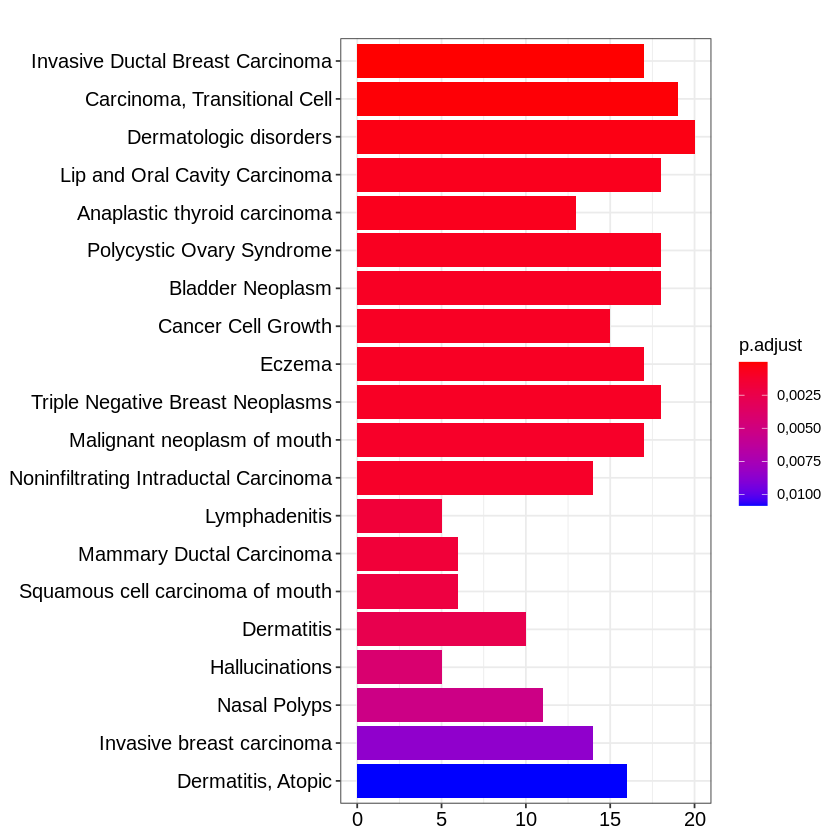

In [20]:
# Самые значимые заболевания
barplot(edo, showCategory=20)

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



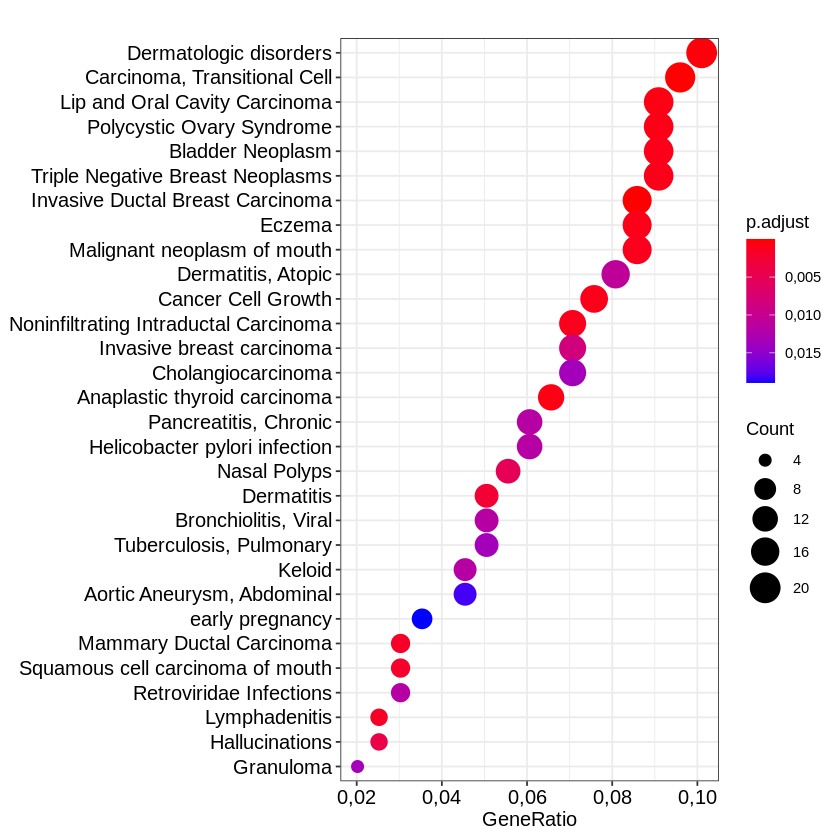

In [21]:
# Очень похожий график
edo2 <- gseNCG(geneList, nPerm=10000)
p1 <- dotplot(edo, showCategory=30)
plot_grid(p1)

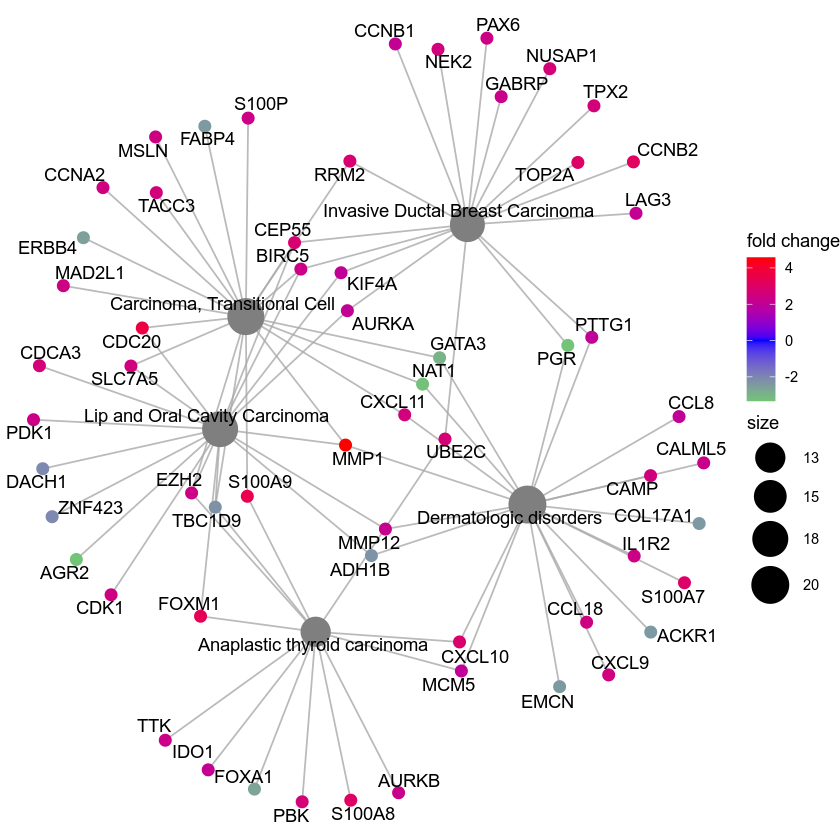

In [45]:
# Можно еще вывести граф по генам
cnetplot(edox, foldChange=geneList)

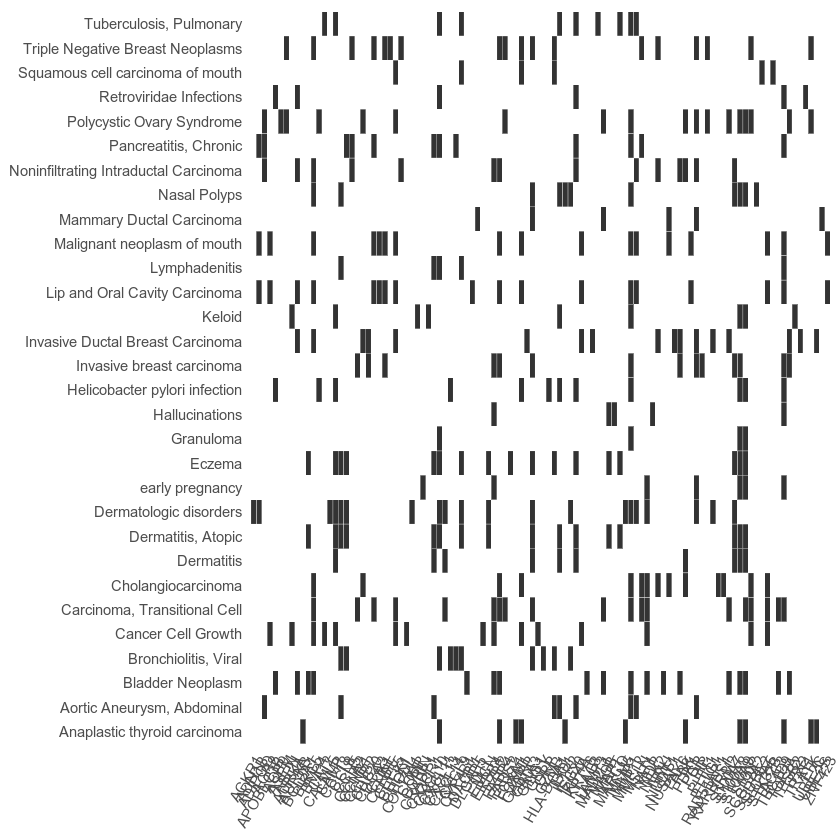

In [49]:
# Вот такой график тоже бывает полезен
# Он показывает, какие гены имеют большую экспрессию
# для конкретного заболевания
heatplot(edox)